In [1]:
import sys
sys.path.append('../fsm/action.py')
sys.path.append('../fsm/machine.py')
sys.path.append('../fsm/state.py')
sys.path.append('../fsm/transition.py')
%run ../fsm/action.py
%run ../fsm/machine.py
%run ../fsm/state.py
%run ../fsm/transition.py
from graphviz import *

class Things(object):
    pass

day = Things()

states = ['School', 'Home', 'Company','Club']
current=['Home']
finals=['School']
transitions = [
    { 'trigger': 'Rest', 'source': 'School', 'dest': 'Home' },
    { 'trigger': 'Study', 'source': 'Home', 'dest': 'School' },
    { 'trigger': 'work', 'source': 'Home', 'dest': 'Company' },
    { 'trigger': 'Play', 'source': 'Home', 'dest': 'Club' },
    { 'trigger': 'Rest', 'source': 'Company', 'dest': 'Home' },
    { 'trigger': 'Sleep', 'source': 'Club', 'dest': 'Home' },
    #{ 'trigger': 'Finish', 'source': 'School', 'dest': 'f' },
   #{ 'trigger': 'Finish', 'source': 'Company', 'dest': 'f' },
]
machine = Fsm(day, states=states, transitions=transitions, initial='Home')
#Initial State
print(day.state)
#From home to school
day.Study()
print(day.state)
#From school to home
day.Rest()
print(day.state)


Home
School
Home


In [2]:
# Initialize model
class Graph(object):
    def __init__(self,states,finals,transitions):
        self.states = states
        self.finals = finals
        self.transitions = transitions
        
    def draw(self,file_name=None,hl_state=None,hl_trigger=None,trigger_state=None):
        #draw the FSM
        f = Digraph(filename=file_name)
        f.attr(rankdir='LR', size='8,5')
        f.attr('node', shape='doublecircle')
        for state in finals:
            if hl_state == state:
                f.node(state,style='filled',color='red')
            else:
                f.node(state)
        f.attr('node', shape='circle')
        for state in states:
            if hl_state == state:
                f.node(state,style='filled',color='pink')
            else:
                f.node(state)
        f.attr('node', shape='circle')
        for transition in transitions:
            if hl_trigger == transition['trigger'] and trigger_state == transition['source']:
                f.edge(transition['source'],transition['dest'],transition['trigger'],style='filled',color='pink')
            else:
                f.edge(transition['source'],transition['dest'],transition['trigger'])
        return f

# pass user data into finite state machine
graph = Graph(states,finals,transitions)
machine = Fsm(graph, states=states, transitions=transitions, initial='Home')

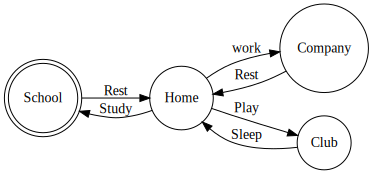

In [3]:
graph.draw()